In [59]:
%matplotlib notebook
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr

In [153]:
data =  pdr.get_data_yahoo(["TSLA", "TATAMOTORS.BO"], start="2020-02-26", end="2020-03-27")


[*********************100%***********************]  2 of 2 completed


In [206]:
class SnaptoCursor(object):
    def __init__(self, ax, x, y, data, company):
        self.ax = ax
        self.ly = ax.axvline(color='k', alpha=0.2)  # the vert line
        self.marker, = ax.plot([0],[0], marker="o", color="crimson", zorder=3) 
        self.x = x
        self.y = y
        self.data = data
        self.com = company
        self.txt = ax.text(x[0], y[0], '')
        
    def mouse_move(self, event):
        if not event.inaxes:
            return
        y = event.ydata
        x=mdates.num2date(event.xdata).date()
       
        indx = np.searchsorted(self.x, pd.to_datetime(x))    
        x = self.x[indx]
        y = self.y[indx]
        
        self.ly.set_xdata(x)
        self.marker.set_data((x,y))
        str_data = 'Date: '+str(x.date()) + '\n Closing: %1.2f' % (y)+ '\n Open: %1.2f' % (self.data['Open'][self.com][indx])+'\n High: %1.2f' % (self.data['High'][self.com][indx])+'\n Low: %1.2f' % (self.data['Low'][self.com][indx])+'\n Volume: '+ str((self.data['Volume'][self.com][indx]))
        
        
        self.txt.set_text((str_data))
        self.txt.set_position((x,y))
        self.ax.figure.canvas.draw_idle()
        

<IPython.core.display.Javascript object>


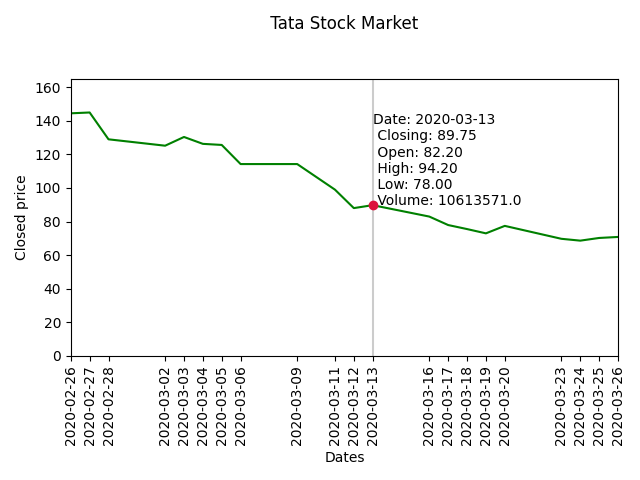

In [218]:
filtered_data = data[data['Close']['TATAMOTORS.BO'].notnull()]
x = pd.to_datetime(filtered_data.index)
y =filtered_data['Close']['TATAMOTORS.BO']
fig, ax = plt.subplots()

cursor = SnaptoCursor(ax, x, y, filtered_data, 'TATAMOTORS.BO')
# defining event for graph 
# here first argument is graph and second is function
cid =  plt.connect('motion_notify_event', cursor.mouse_move)



ax.plot(x, y,'g')
plt.axis([x.min(), x.max(), 0, y.max()+20])
plt.title(' Tata Stock Market \n\n')
plt.xticks(x, rotation=90)
plt.ylabel('Closed price')
plt.xlabel('Dates')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>


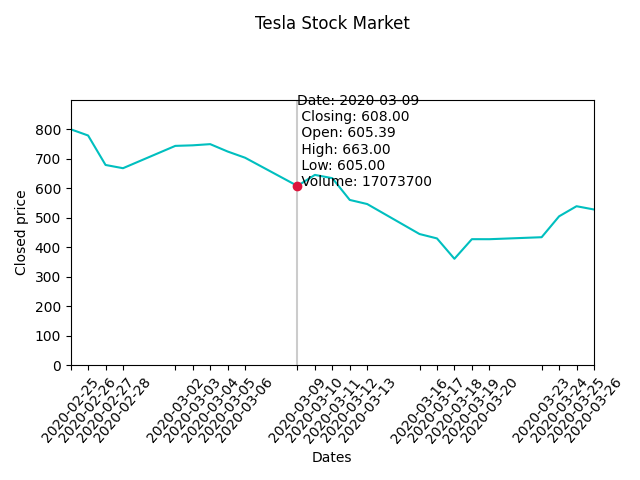

In [217]:

x = pd.to_datetime(data.index)
y = data['Close']['TSLA']
fig, ax = plt.subplots()

cursor = SnaptoCursor(ax, x, y, data, 'TSLA')
# defining event for graph 
# here first argument is graph and second is function
cid =  plt.connect('motion_notify_event', cursor.mouse_move)


ax.plot(x, y,'c')
plt.axis([x.min(), x.max(), 0, y.max()+100])
plt.title('Tesla Stock Market\n\n\n')
plt.xticks(x, rotation=50)
plt.ylabel('Closed price')
plt.xlabel('Dates')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tight_layout()
plt.show()
